In [1]:
#read data from emails.csv
import numpy as np
import pandas as pd
import datetime as dtime
import matplotlib.pyplot as plt
import seaborn as sns


filepath = '/Users/Jose/Documents/data.csv'
data = pd.read_csv(filepath)
df = pd.DataFrame(data)

In [2]:
df.head()

,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


In [3]:
dates = df['date']

In [4]:
from datetime import datetime, timedelta

def dateconvert(x):
    x = str(x)
    date = datetime(year=int(x[0:4]), month=int(x[4:6]), day=int(x[6:8]))
    return date

In [5]:
dates = dates.apply(dateconvert)

In [6]:
df['date'] = dates

In [7]:
#check for null values
df.isnull().sum()

date               0
signal             0
spy_close_price    0
dtype: int64

In [8]:
df['signal'].mean()

5.166602814635683

In [9]:
df['signal']

0      3.107767
1      3.107282
2      3.099757
3      3.134223
4      3.135922
5      3.143447
6      3.127184
7      3.139320
8      3.174029
9      3.190777
10     3.202670
11     3.194417
12     3.190777
13     3.217476
14     3.200971
15     3.199515
16     3.188592
17     3.187379
18     3.215291
19     3.220388
20     3.263350
21     3.265534
22     3.271602
23     3.281311
24     3.285437
25     3.261189
26     3.285437
27     3.281311
28     3.266019
29     3.302160
         ...   
637    4.800971
638    4.780340
639    4.781068
640    4.686650
641    4.672330
642    4.706068
643    4.660437
644    4.661893
645    4.636650
646    4.703762
647    4.697330
648    4.690291
649    4.729126
650    4.751456
651    4.750485
652    4.790291
653    4.815291
654    4.828155
655    4.842233
656    4.834709
657    4.859223
658    4.862379
659    4.860437
660    4.857767
661    4.871602
662    4.869175
663    4.866505
664    4.859468
665    4.881311
666    4.868689
Name: signal, Length: 66

In [10]:
df['spy_close_price'].mean()

163.1693688155922

In [11]:
df['spy_close_price'].median()

159.75

In [12]:
df['signal'].median()

3.89368932

In [13]:
df['date'].max()

Timestamp('2014-08-29 00:00:00')

In [14]:
df['date'].min()

Timestamp('2012-01-03 00:00:00')

In [15]:
dates = df['date']
dup = dates.duplicated()
dup[dup == True]

Series([], Name: date, dtype: bool)

In [16]:
#find outliers in date by turning to datetime data type
# outliers appear to be dates at year 1970

x = df['signal']
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
outliers = x[((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR)))]
outliersi = outliers.index
signal_outliers = outliersi
outliers

303     -3.802670
459    429.514563
460    432.961165
570      0.004560
571      0.454976
572      0.455898
Name: signal, dtype: float64

In [17]:
#find outliers in date by turning to datetime data type
# outliers appear to be dates at year 1970

x = df['spy_close_price']
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
outliers = x[((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR)))]
outliersi = outliers.index
price_outliers = outliersi
outliers

421    618.95
422    619.33
423    710.31
Name: spy_close_price, dtype: float64

C:\Users\Jose\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


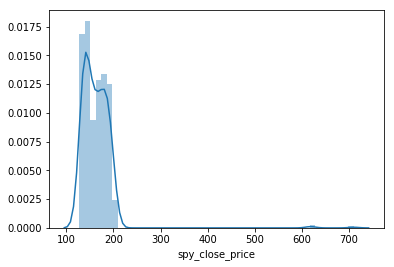

In [18]:
sns.distplot(df['spy_close_price'])

C:\Users\Jose\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


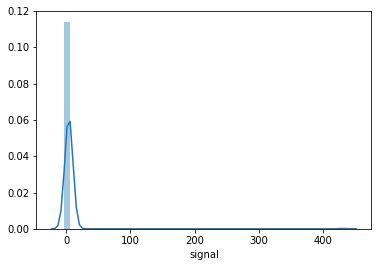

In [19]:
sns.distplot(df['signal'])

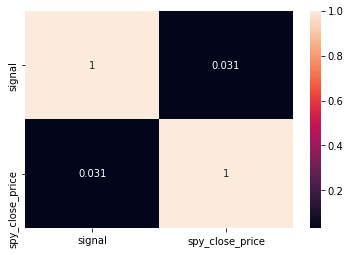

In [20]:
sns.heatmap(df.corr(), annot=True)

In [21]:
df.columns

Index(['date', 'signal', 'spy_close_price'], dtype='object')

In [22]:
X = df.as_matrix(['signal'])

c:\users\jose\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
y = df.as_matrix(['spy_close_price'])

c:\users\jose\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Coefficients: 
 [[0.04927094]]
Mean squared error: 2026.54
R-squared = : -0.00


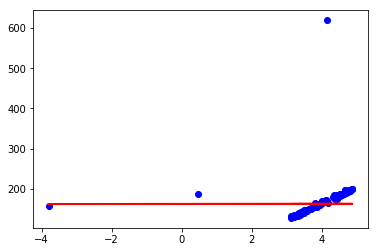

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.8, test_size=0.2, random_state = 0)
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('R-squared = : %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)

In [25]:
import math
# Have a look at R sq to give an idea of the fit 
print('R sq: ',regr.score(X_train,y_train))

# and so the correlation is..
print('Correlation: ', math.sqrt(regr.score(X_train,y_train)))

R sq:  0.0011745748098578312
Correlation:  0.03427207040518316


In [26]:
#we can try to drop outliers
df2 = df
df2 = df2.drop(price_outliers)
df2 = df2.drop(signal_outliers)

C:\Users\Jose\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


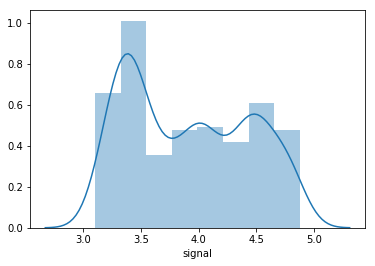

In [27]:
sns.distplot(df2['signal'])

C:\Users\Jose\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


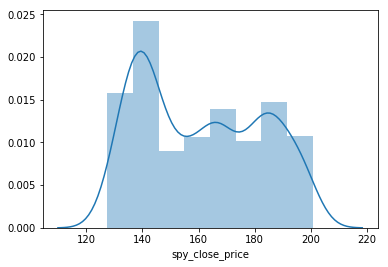

In [28]:
sns.distplot(df2['spy_close_price'])

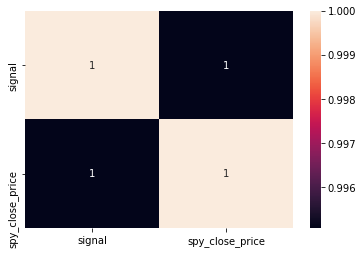

In [29]:
sns.heatmap(df2.corr(), annot=True)

Coefficients: 
 [[40.61966788]]
Mean squared error: 3.72
R-squared = : 0.99


c:\users\jose\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\jose\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


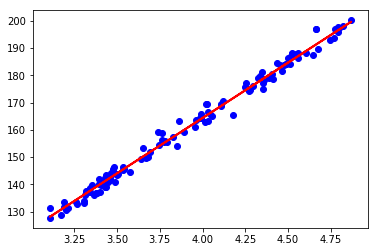

In [30]:
X = df2.as_matrix(['signal'])
y = df2.as_matrix(['spy_close_price'])
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.8, test_size=0.2, random_state = 0)
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('R-squared = : %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)